In [1]:
### This file is the demo data figure for the paper 'Adaptive stretching of representations across brain regions and deep learning model layers'

import pandas as pd
import os
from scipy import stats
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
def compare(Mtr,Mat):              
    Mcolour_vec=torch.zeros(120)
    Base_vec=np.zeros(120)
    cc=0
    for row in range(16):
      for col in range(row+1,16):
        Mcolour_vec[cc]=Mat[row,col]
        Base_vec[cc]=Mtr[row,col]
        cc+=1
    [corr,pvalue] = stats.spearmanr(Base_vec,Mcolour_vec)
    return corr

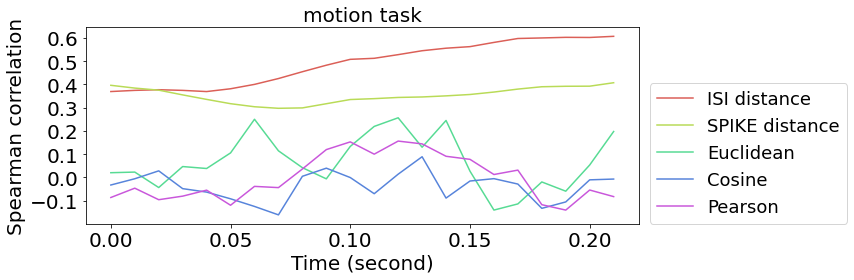

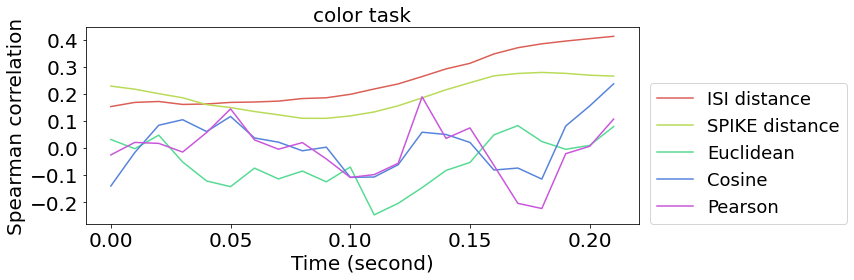

In [3]:
## ****** Demo for Figure 2 ****** ##
upper_time = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
upper_time2 = [0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
points={'[0, 0]':0,'[-5, 0]':1,'[5, 0]':2,'[0, -5]':3,'[0, 5]':4,'[90, 90]':5,'[90, 30]':6,'[90, -30]':7,'[90, -90]':8,
        '[30, 90]':9,'[30, 30]':10,'[30, -30]':11,'[30, -90]':12,'[-30, 90]':13,'[-30, 30]':14,'[-30, -30]':15,
        '[-30, -90]':16,'[-90, 90]':17,'[-90, 30]':18,'[-90, -30]':19,'[-90, -90]':20}

colors = sns.color_palette("hls", 5)
baseline_matrix = torch.load('../data/mini_data_50ms/stimuli_matrix.pt')
bin_size = 50 #ms

for task in ['motion','color']:
    NN=0
    plt.figure(figsize=(12,4))
    for method in ['ISI','SPIKE','Euclidean','Cosine','Pearson']:
        if method in ['ISI','SPIKE']:

            correlation = []
            for time in upper_time:

                ED = torch.load(f'../data/mini_data_50ms/{task}_{method}_{time}_{bin_size}ms.pt')
                correlation.append(compare(ED, baseline_matrix))
            plt.plot([i for i in upper_time],correlation,'-',color=colors[NN])
            NN+=1

        else:

            correlation = []
            for time in upper_time2:
                if method == 'Euclidean':
                    ED = torch.load(f'../data/mini_data_50ms/e_{task}_{time}_{bin_size}ms.pt')
                    correlation.append(compare(ED, baseline_matrix))
                if method == 'Cosine':
                    ED = -1*torch.load(f'../data/mini_data_50ms/c_{task}_{time}_{bin_size}ms.pt')
                    correlation.append(compare(ED, baseline_matrix))
                if method == 'Pearson':
                    ED = -1*torch.load(f'../data/mini_data_50ms/p_{task}_{time}_{bin_size}ms.pt')
                    correlation.append(compare(ED, baseline_matrix))
            plt.plot([i for i in upper_time], correlation, '-',color=colors[NN])
            NN+=1


    plt.legend( ['ISI distance','SPIKE distance','Euclidean','Cosine','Pearson'], bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0,fontsize=18)
    plt.title(f'{task} task',fontsize=20)
    plt.xlabel('Time (second)',fontsize=20)
    plt.ylabel('Spearman correlation',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

In [4]:
## ****** Demo for Figure 3 ****** ##
def ave_ratio_s(ColourDM,MotionDM,qua):
    dhc=[]
    dvc=[]
    dhm=[]
    dvm=[]
    set=[]
    for comb1 in qua:
        for comb2 in qua:
            if comb1!=comb2:
                idx1 = points[comb1] #[0] color, [1] motion
                idx2 = points[comb2]
                if idx1[0] == idx2[0] : # same color but differ motion
                    dhc.append(float(ColourDM[comb1-1,comb2-1]))
                    dhm.append(float(MotionDM[comb1-1,comb2-1]))
                    # c0+=1
                elif idx1[1] == idx2[1] : # same motion but differ color
                    dvc.append(float(ColourDM[comb1-1,comb2-1]))
                    dvm.append(float(MotionDM[comb1-1,comb2-1]))

    return dhc,dvc,dhm,dvm


def get_distance_from(x,y,task):
    distance_m = []
    distance_c=[]
    for i in range(len(x)):
        point0 = x[i]
        point1 = y[i]

        if task=='color' and i<len(x)/2:
            distance_m.append(point0)
            distance_c.append(point1)
        elif task =='motion' and i>=len(x)/2:
            distance_m.append(point0)
            distance_c.append(point1)
    return np.mean(distance_m), np.mean(distance_c)



def plot_compare(x,y,itv=0.002):
    name = ['mismatch on motion' for i in range(int(len(x) / 2))] + ['mismatch on color' for i in range(int(len(y) / 2))]
    data = {'dc': x, 'dm': y, 'Set': name}
    dhcdhm = pd.DataFrame(data)
    sns.set(style='white',font_scale=1.5) 
    et=max(max(x),max(x)) + itv
    st=min(min(y),min(y)) - itv
    g = sns.jointplot(x="dc", y="dm", hue="Set", data=dhcdhm,height=6,xlim=(st,et),ylim=(st,et))
    g.ax_joint.set_xlabel("Dissimilarity in motion task",fontsize=24)
    g.ax_joint.set_ylabel("Dissimilarity in color task",fontsize=24)
    g.ax_joint.axline((0, 0), slope=1,c='k')
    plt.legend(fontsize=17)
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


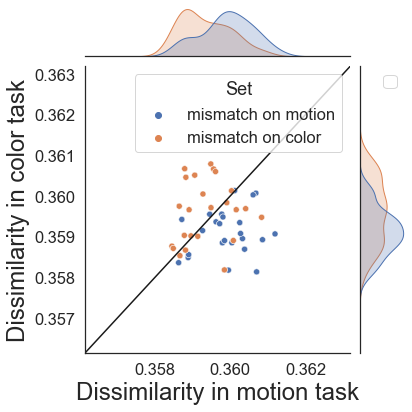

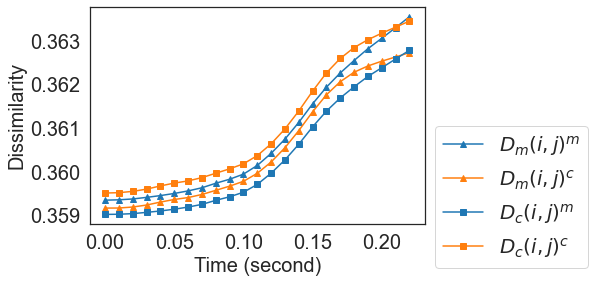

In [5]:
upper_time = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22]

np.set_printoptions(precision=2)

points={1:[90, 90],2:[90, 30],3:[90, -30],4:[90, -90],
    5:[30, 90],6:[30, 30],7:[30, -30],8:[30, -90],
    9:[-30, 90],10:[-30, 30],11:[-30, -30],12:[-30, -90],
    13:[-90, 90],14:[-90, 30],15:[-90, -30],16:[-90, -90]}

I=[11,12,15,16]
II=[9,10,13,14]
III=[1,2,5,6]
IV=[3,4,7,8]

tim = []
dis = []
q = []

# 2D plot
ISI_dhc = []
ISI_dvc = []
ISI_dhm = []
ISI_dvm = []
MotionDM = torch.load(f'../data/mini_data_stre_50ms/Motion_ISI_1000.pt') # or LSTM representations
ColourDM = torch.load(f'../data/mini_data_stre_50ms/Color_ISI_1000.pt') # or LSTM representations
dhc, dvc, dhm, dvm = ave_ratio_s(ColourDM, MotionDM, I + II + III + IV)
ISI_dhc = ISI_dhc + dhc
ISI_dhm = ISI_dhm + dhm
ISI_dvc = ISI_dvc + dvc
ISI_dvm = ISI_dvm + dvm
font_size = 1.5
y = ISI_dhc + ISI_dvc
x = ISI_dhm + ISI_dvm
plot_compare(x, y)

plt.figure()
# line plot
method = 'ISI'
col=['tab:blue','tab:orange']
for task in ['color','motion']:
    tim = []
    dis_m = []
    dis_c= []
    q_m = []
    q_c=[]
    for time in upper_time:
        MotionDM = torch.load(f'../data/mini_data_stre_50ms/motion_ISI_{time}_{bin_size}ms.pt')
        ColourDM = torch.load(f'../data/mini_data_stre_50ms/color_ISI_{time}_{bin_size}ms.pt')
        dhc,dvc,dhm,dvm = ave_ratio_s(ColourDM,MotionDM,I+II+III+IV) # 3
        ISI_dhc = dhc
        ISI_dhm = dhm
        ISI_dvc = dvc
        ISI_dvm = dvm
        font_size=1.3
        y=ISI_dhc+ISI_dvc
        x=ISI_dhm+ISI_dvm
        m,c = get_distance_from(x,y,task) # a number
        dis_m.append(np.mean(m))
        dis_c.append(np.mean(c))
        tim.append(time)
    if task =='motion':
            plt.plot(tim,dis_m,'s-',color=col[0])
            plt.plot(tim,dis_c,'s-',color=col[1])
    else:
        plt.plot(tim,dis_m,'^-',color=col[0])
        plt.plot(tim,dis_c,'^-',color=col[1])
        
    if task == 'color':
        mat_color_under_m = dis_m #D_m ^ m
        mat_color_under_c = dis_c #D_m ^c
    elif task == 'motion':
        mat_motion_under_m = dis_m #D_c ^m
        mat_motion_under_c = dis_c  #D_c ^ c

labels = [r'$D_{m}(i,j)^{m}$', r'$D_{m}(i,j)^c$', r'$D_{c}(i,j)^m$', r'$D_{c}(i,j)^c$']
plt.legend(labels, bbox_to_anchor=(1, 0.5),fontsize=20)
plt.xlabel("Time (second)", fontsize=20)
plt.ylabel("Dissimilarity", fontsize=20)
plt.xticks( fontsize = 20 )
plt.yticks( fontsize=20 )
plt.show() 


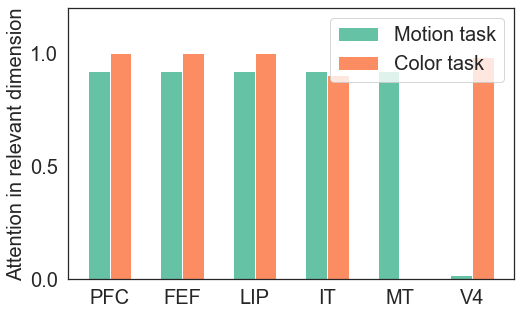

In [6]:
def compare(Mtr, Mat):
    Mcolour_vec = torch.zeros(120)
    Base_vec = np.zeros(120)
    cc = 0
    for row in range(16):
        for col in range(row + 1, 16):
            Mcolour_vec[cc] = Mat[row, col]
            Base_vec[cc] = Mtr[row, col]
            cc += 1

    [corr, pvalue] = stats.spearmanr(Base_vec, Mcolour_vec)
    return corr, pvalue

## ****** Demo for Figure 4 ****** ##

coords = [(1,1),(2,1),(3,1),(4,1),(1,2),(2,2),(3,2),(4,2),(1,3),(2,3),(3,3),(4,3),(1,4),(2,4),(3,4),(4,4)]

plt.figure(figsize=(8,5))
meas='ISI'
bar_colors = ['#66c2a5',
'#fc8d62'] 

spear_m = []
spear_c = []
for task in ['Motion','Color']:
    att=[]
    for roi in ['PFC', 'FEF','LIP','IT','MT','V4']:
        cc=[]
        pp=[]
        test_matrix = torch.load(f'../data/mini_data_stre_50ms/{roi}_{task}_{meas}.pt')
        for w_m in np.linspace(0,1,50+1):
            matrix_att = torch.zeros((16,16))
            for i in range(len(coords)):
                for j in range(len(coords)):
                    w_c= 1-w_m
                    matrix_att[i,j] = 1 - np.exp(-1*np.sqrt( w_m*(coords[i][0]-coords[j][0])**2 + w_c*(coords[i][1]-coords[j][1])**2 ) )
            cc.append(compare(matrix_att,test_matrix)[0])
            pp.append(compare(matrix_att,test_matrix)[1])

        idx = cc.index(max(cc))
        if task =='Motion':
            att.append(np.linspace(0,1,50+1)[idx])
            spear_m.append(max(cc))
            at_value = np.linspace(0,1,50+1)[idx]
        else:
            att.append(1-np.linspace(0,1,50+1)[idx])
            spear_c.append(max(cc))
            at_value = 1 - np.linspace(0,1,50+1)[idx]
    x = np.arange(len(att))
    width = 0.3
    plt.bar(x-width/2 + width*['Motion', 'Color'].index(task), att, width,color=bar_colors[['Motion', 'Color'].index(task)])

plt.ylim(0,1.2)
plt.legend(['Motion task','Color task'],fontsize=20)
# plt.xticks(np.arange(0, len(att), 1), ['Layer 1','Layer 2','Layer 3','Layer 4','Layer 5','Layer 6'],fontsize = 20,rotation=15)
plt.xticks(np.arange(0, len(att), 1), ['PFC', 'FEF','LIP','IT','MT','V4'],fontsize = 20)
plt.yticks([0,0.5,1],fontsize=20)
plt.ylabel('Attention in relevant dimension',fontsize=20) # plt.ylabel('Combined modulation of attention',fontsize=20)
plt.show()

In [7]:
import itertools
import matplotlib

def compare(Mtr, Mat):
    Mcolour_vec = torch.zeros(120)
    Base_vec = np.zeros(120)
    cc = 0
    for row in range(16):
        for col in range(row + 1, 16):
            Mcolour_vec[cc] = Mat[row, col]
            Base_vec[cc] = Mtr[row, col]
            cc += 1

    [corr, pvalue] = stats.spearmanr(Base_vec, Mcolour_vec)
    return corr

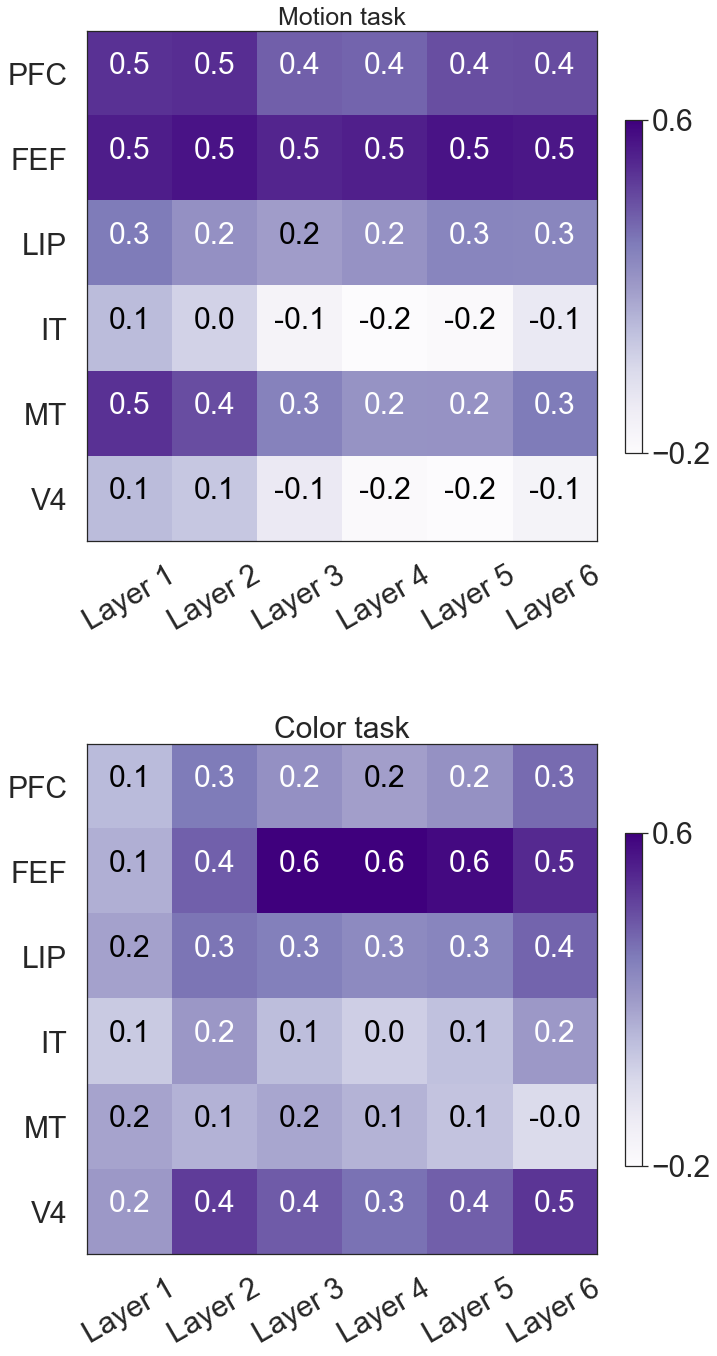

In [8]:
## ****** Demo for Figure 5 ****** ##
# here we take 150th image (a random chosen number) for an example

for time in [150]: 
    time_c = time / 60 - 1.5
    k = 0
    plt.figure(figsize=(10, 20))
    for task in ['motion', 'color']:
        H= torch.zeros(6,6) # row is region, column is layer
        for roi in ['PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4']:
            if task == 'motion':
                baseline_matrix = torch.load(f'../data/mini_data_50ms/bs1_{roi}_Motion_ISI.pt')
            elif task == 'color':
                baseline_matrix = torch.load(f'../data/mini_data_50ms/bs1_{roi}_Color_ISI.pt') 
            for layer in [1,2,3,4,5,6]:
                correlation = []
                test_matrix = torch.load(f'../data/mini_data_50ms/bs1_{layer}layer_task_{task}_{time}.pt')

                H[['PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4'].index(roi), layer - 1] = compare(test_matrix,
                                                                                            baseline_matrix)
        CM = H.numpy()
        cmap = plt.get_cmap('Purples')
        norm = matplotlib.colors.Normalize(vmin=-0.2,vmax=0.6)
        if task=='motion':
            plt.subplot(211)
            plt.imshow(CM, interpolation='nearest', cmap=cmap,norm=norm)
            plt.title('Motion task',fontsize=25)
        elif task=='color':
            plt.subplot(212)
            plt.imshow(CM, interpolation='nearest', cmap=cmap,norm=norm)
            plt.title('Color task',fontsize=30)

        roi_names = ['PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4']
        layer_names = ['Layer 1','Layer 2','Layer 3','Layer 4','Layer 5','Layer 6']
        tick_marks = np.arange(len(roi_names))
        plt.xticks(tick_marks, layer_names, rotation=30,fontsize=30)
        plt.yticks(tick_marks, roi_names,fontsize=30)
        plt.tick_params(axis='both', 
                        direction='out', 
                        length=10, 
                        width=2, 
                        pad=10)
        cbar = plt.colorbar(ticks=([-0.2, 0.6]),fraction=0.03)
        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(30)
        thresh = CM.mean()
        for i, j in itertools.product(range(CM.shape[0]), range(CM.shape[1])):
            plt.text(j, i, "{:.1f}".format(CM[i, j]),fontsize=30,
                        horizontalalignment="center",
                        color="white" if CM[i,j]>=0.2 else "black")
    plt.tight_layout(pad=1)
    plt.show()
